# Reconstruction Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('arrayfire')

## Load Data

In [1]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  '171a'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0])

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

NameError: name 'glob' is not defined

# Create Reconstruction Object

In [20]:
# Set position segment
dataset.position_segment_indicies = [3]
# dataset.frame_mask = [20, 21, 22]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=500, pad_value='mean')

# Apply frame-dependent position offset
recon.applyFrameDependentOffset(offset=26)

# Normalize measurements
scale = recon.normalize_measurements(wrap_coefficient=0.22)  #0.11

# Estimate and subtract background
# bg = recon.estimateBackground()



# Simulate measurements
# recon.simulate_measurements(filename='./static.npz')

# # Register Measurements
# recon.reconstruct(iteration_count=-1, mode='static', step_size=0.1, reg_types={'l2': 1e-3})
# recon.show()

Calculated wrapping coefficient 0.11


## Ensuring Convolution ops are of correct size

<IPython.core.display.Javascript object>


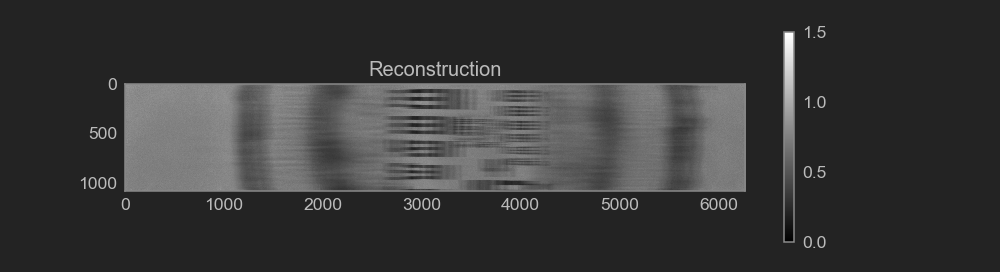

In [21]:
# recon._gen_forward_operators()
recon.reconstruct(iteration_count=-1, step_size=1, mode='static', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

## Sequential Recon

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.69e+06    |       0.00       |    0.00e+00    |  585.1 MB / 3928.7 MB  |
|   10   |    1.01e+04    |       4.39       |    1.46e+02    |  585.3 MB / 4010.2 MB  |
|   20   |    3.84e+03    |       9.01       |    9.61e+00    |  507.1 MB / 2356.9 MB  |
|   30   |    3.67e+03    |      13.48       |    3.51e+00    |  507.1 MB / 2356.9 MB  |
|   40   |    3.61e+03    |      17.94       |    2.43e+00    |  507.1 MB / 2356.9 MB  |
|   50   |    3.58e+03    |      22.40       |    2.40e+00    |  507.1 MB / 2356.9 MB  |
|   60   |    3.58e+03    |      26.86       |    1.72e+00    |  507.1 MB / 2356.9 MB  |
|   70   |    3.59e+03    |      31.33       |    4.46e+00    |  507.1 MB / 2302.6 MB  |
|   80   |    3.59e+03    |      35.80       |    3.29e+00    |  507.1 MB / 2302.6 MB  |
|   90   |    3.59e+0

<IPython.core.display.Javascript object>


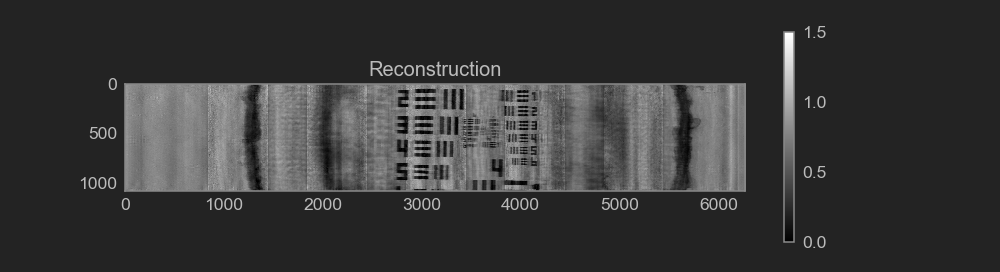

In [23]:
# recon._gen_forward_operators()
recon.reconstruct(iteration_count=100, step_size=1, mode='sequential', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

## Global Recon

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.41e+06    |       0.00       |    0.00e+00    |  611.5 MB / 3874.4 MB  |
|   10   |    3.11e+03    |       2.64       |    2.45e+00    |  611.8 MB / 3957.8 MB  |
|   20   |    2.58e+03    |       5.13       |    1.37e+00    |  612.0 MB / 3957.8 MB  |
|   30   |    2.50e+03    |       7.61       |    9.11e-01    |  612.1 MB / 3957.8 MB  |
|   40   |    2.48e+03    |      10.09       |    3.01e-01    |  612.1 MB / 3894.5 MB  |
|   50   |    2.47e+03    |      12.57       |    1.64e-01    |  612.1 MB / 3894.5 MB  |
|   60   |    2.47e+03    |      15.05       |    1.35e-01    |  612.1 MB / 3894.5 MB  |
|   70   |    2.47e+03    |      17.52       |    8.40e-02    |  612.1 MB / 3894.5 MB  |
|   80   |    2.46e+03    |      20.01       |    2.15e-02    |  612.2 MB / 3894.5 MB  |
|   90   |    2.46e+0

<IPython.core.display.Javascript object>


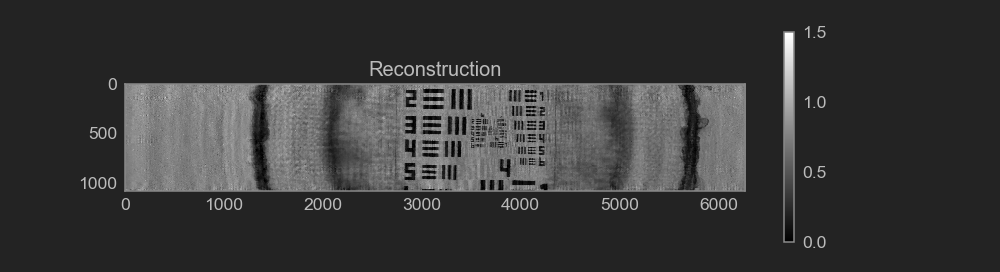

In [22]:
recon.reconstruct(iteration_count=100, step_size=0.5, mode='global', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

## Single-frame

In [ ]:
recon.reconstruct(iteration_count=50, step_size=1, mode='single', reg_types={'tv': 1e-3}, frame_number=0)
recon.show(clim=(0, 2))

##  Global Recon